# Transfer Learning Maarastawi et al. 2018 - genus
# Table of contents 
1. [Linear Regression](#LinearRegression)
2. [MLP (Dense)](#MLP)
3. [AE combined latent subset features](#AE_combined_subsetFeatures)
4. [AE OTU latent](#AE_latentOTU)

In [1]:
from data import *
from train_2 import *
from transfer_learning import *
from test_functions import *
from layers import *
from utils import *
from loss import *
from metric import *
from results import *
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_differentDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/Aggregated/otu_table_Genus.csv',
              metadata_filename='data/Aggregated/metadata_table_all_80.csv',
              metadata_names_transfer=['pH', 'N', 'C', 'C.N'],
              otu_transfer_filename='data/Maarastawi2018/otu_table_Genus_Maarastawi2018.csv',
              metadata_transfer_filename='data/Maarastawi2018/metadata_table_Maarastawi2018.csv')

In [3]:
print(df_domain_train.shape)
print(df_domain_test.shape)
print(df_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_test.shape)

(4251, 3)
(373, 3)
(86, 4)
(37, 4)


In [4]:
print('TRAIN:')
print('pH:' + str(df_domain_transfer_learning_train.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_train.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_train.loc[:,'C'].mean()))
    
print('TEST:')
print('pH:' + str(df_domain_transfer_learning_test.loc[:,'pH'].mean()))
print('N:' + str(df_domain_transfer_learning_test.loc[:,'N'].mean()))
print('C:' + str(df_domain_transfer_learning_test.loc[:,'C'].mean()))

TRAIN:
pH:4.941860465116278
N:0.07779069767441861
C:1.0279069767441862
TEST:
pH:4.818918918918919
N:0.0727027027027027
C:0.9551351351351353


In [5]:
df_microbioma_train

,519510,810959,4337833,146122,107036,570086,1000876,743788,578951,221791,...,269781,1051517,550219,254401,546690,966091,902698,591499,569066,823633
11116.I06A093.1197717,7,0,16,77,0,55,36,1,2,5,...,5,6,88,160,0,0,93,1,36,1
11116.L09A088.1196780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11116.L11A084.1195839,38,0,20,68,0,86,25,0,13,7,...,14,2,110,68,0,8,59,1,48,0
11116.L07A076.1194918,41,1,22,41,0,78,38,0,20,1,...,30,1,90,71,0,2,57,2,57,1
11116.L01A070.1197015,14,0,3,15,0,70,15,0,3,1,...,6,0,22,48,0,1,13,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116.L30A065.1196361,3,0,6,26,0,7,5,0,3,1,...,4,6,80,13,0,2,28,5,7,0
11116.A11A061.1196939,219,1,26,61,0,29,57,1,9,8,...,1,0,784,58,1,36,146,2,29,12
11116.L01A079.1194513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11116.L16A071.1195685,14,0,8,23,0,145,23,0,9,2,...,3,2,51,197,0,4,48,7,25,1


In [6]:
df_microbioma_transfer_learning_train

,519510,810959,4337833,146122,107036,570086,1000876,743788,578951,221791,...,269781,1051517,550219,254401,546690,966091,902698,591499,569066,823633
39,0,0,0,0,0,6,5,0,23,0,...,0,2,0,10,0,0,0,0,0,0
98,0,0,0,0,0,3,305,0,272,0,...,0,35,0,16,0,0,0,0,51,43
83,0,0,0,0,0,1,20,0,20,0,...,0,22,0,12,0,0,0,0,2,9
12,0,0,0,0,0,2,13,0,69,0,...,0,85,0,45,0,1,0,0,41,30
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,22,64,0,64,0,...,0,9,0,44,0,0,0,0,38,14
20,0,0,0,0,0,5,17,0,154,0,...,0,12,0,50,0,0,0,0,33,18
116,0,0,0,0,0,33,29,0,78,0,...,1,19,0,34,0,0,0,0,10,21
67,0,0,0,0,0,5,81,0,125,0,...,3,34,0,43,0,0,0,0,13,44


### Get numpy transfer_learning objects

In [7]:
data_microbioma_transfer_learning_train = df_microbioma_transfer_learning_train.to_numpy(dtype=np.float32)
data_microbioma_transfer_learning_test = df_microbioma_transfer_learning_test.to_numpy(dtype=np.float32)
data_domain_transfer_learning_train = df_domain_transfer_learning_train.to_numpy(dtype=np.float32)
data_domain_transfer_learning_test = df_domain_transfer_learning_test.to_numpy(dtype=np.float32)

In [8]:
print(df_microbioma_transfer_learning_train.shape)
print(data_microbioma_transfer_learning_train.shape)
print(data_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_train.shape)

(86, 221)
(86, 221)
(86, 4)
(86, 4)


In [9]:
df_microbioma_transfer_learning_train

,519510,810959,4337833,146122,107036,570086,1000876,743788,578951,221791,...,269781,1051517,550219,254401,546690,966091,902698,591499,569066,823633
39,0,0,0,0,0,6,5,0,23,0,...,0,2,0,10,0,0,0,0,0,0
98,0,0,0,0,0,3,305,0,272,0,...,0,35,0,16,0,0,0,0,51,43
83,0,0,0,0,0,1,20,0,20,0,...,0,22,0,12,0,0,0,0,2,9
12,0,0,0,0,0,2,13,0,69,0,...,0,85,0,45,0,1,0,0,41,30
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,22,64,0,64,0,...,0,9,0,44,0,0,0,0,38,14
20,0,0,0,0,0,5,17,0,154,0,...,0,12,0,50,0,0,0,0,33,18
116,0,0,0,0,0,33,29,0,78,0,...,1,19,0,34,0,0,0,0,10,21
67,0,0,0,0,0,5,81,0,125,0,...,3,34,0,43,0,0,0,0,13,44


# 1. Linear regression <a name="LinearRegression"></a>

In [10]:
def model(shape_in, shape_out, output_transform):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [11]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None)
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.001),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [12]:
latent_space = 0
results, modelsLR = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>99</b></p>

<b>loss</b>: 4.6062 (min: 4.4304, max: 4.8368)

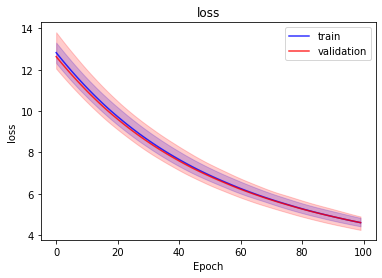

<b>domain_BrayCurtis</b>: 0.6741 (min: 0.6190, max: 0.7457)

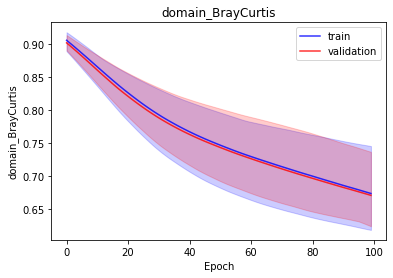

<b>domain_pearson_corr</b>: 0.3469 (min: 0.1405, max: 0.5350)

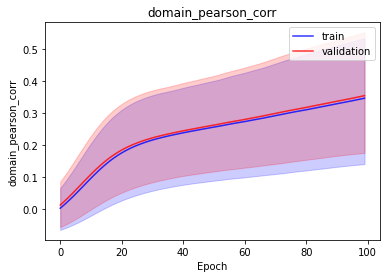

<b>domain_jensen_shannon_divergence</b>: 2.0421 (min: 1.7687, max: 2.5098)

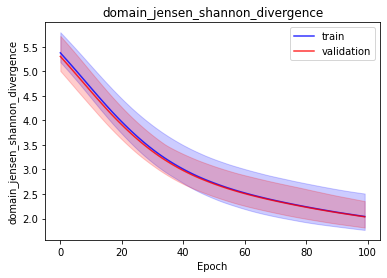

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 4.606205806504532 | 4.430409023727196 | 4.8367627530858135 |
| domain_BrayCurtis | 0.6740521788597107 | 0.6190224885940552 | 0.7456891536712646 |
| domain_pearson_corr | 0.34686967730522156 | 0.14049656689167023 | 0.5350196957588196 |
| domain_jensen_shannon_divergence | 2.0420825481414795 | 1.7686766386032104 | 2.5098018646240234 |


[('best_lost_epoch', 99),
 ('val_loss', [4.607612419128418, 4.254299163818359, 4.902872085571289]),
 ('val_domain_BrayCurtis', [0.6712259, 0.6245755, 0.7369361]),
 ('val_domain_pearson_corr', [0.35491344, 0.17555654, 0.55364186]),
 ('val_domain_jensen_shannon_divergence', [2.0361469, 1.8167769, 2.3564918])]

In [13]:
print_results(results)

In [14]:
predictions = test_model(modelsLR, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_linear_regresion.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.699670135974884 | 0.6428128480911255 | 0.7693045139312744 |
| pearson_corr | 0.3066132664680481 | 0.12385474145412445 | 0.4748772382736206 |
| jensen_shannon_divergence | 2.236515522003174 | 2.0008182525634766 | 2.640824556350708 |


# 2. MLP (Dense) <a name="MLP"></a>

In [15]:
def model(shape_in, shape_out, output_transform, layers_list, activation_fn):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    for s in layers_list:
        net = layers.Dense(s, activation=activation_fn)(net)
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [16]:
def model_fn():
    m = model(shape_in=data_domain_transfer_learning_train.shape[1],
              shape_out=data_microbioma_transfer_learning_train.shape[1],
              output_transform=None,
              layers_list=[128,512],
              activation_fn='tanh')
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.01),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [17]:
latent_space=0
results, modelsMLP = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>29</b></p>

<b>loss</b>: 2.8073 (min: 2.5610, max: 3.0024)

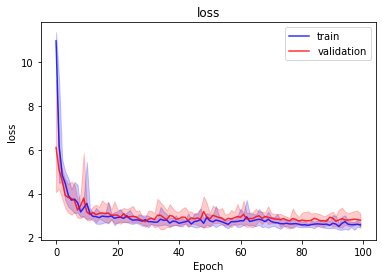

<b>domain_BrayCurtis</b>: 0.4222 (min: 0.4086, max: 0.4325)

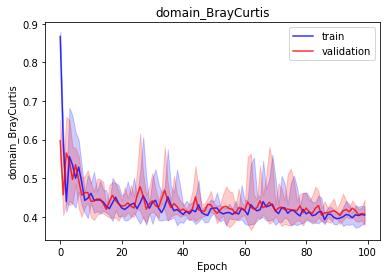

<b>domain_pearson_corr</b>: 0.7118 (min: 0.6912, max: 0.7249)

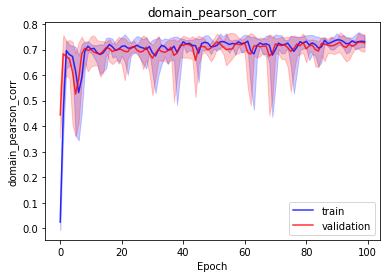

<b>domain_jensen_shannon_divergence</b>: 0.9916 (min: 0.9365, max: 1.0328)

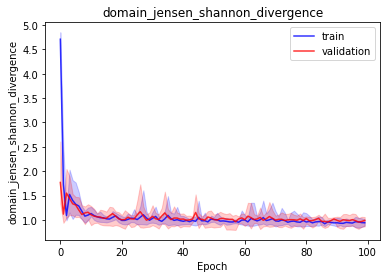

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 2.8072560831510605 | 2.5609693423561426 | 3.002361916113591 |
| domain_BrayCurtis | 0.4221549928188324 | 0.4086245894432068 | 0.43254393339157104 |
| domain_pearson_corr | 0.7118164300918579 | 0.6912491321563721 | 0.7249146699905396 |
| domain_jensen_shannon_divergence | 0.9915764927864075 | 0.9365199208259583 | 1.0327521562576294 |


[('best_lost_epoch', 29),
 ('val_loss', [2.712963104248047, 2.4751453399658203, 2.91542387008667]),
 ('val_domain_BrayCurtis', [0.43385702, 0.40832353, 0.47873932]),
 ('val_domain_pearson_corr', [0.6837274, 0.60920584, 0.7304146]),
 ('val_domain_jensen_shannon_divergence', [1.0202837, 0.8587222, 1.1518406])]

In [18]:
print_results(results)

In [19]:
predictions = test_model(modelsMLP, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.45197993516921997 | 0.44133347272872925 | 0.4620662331581116 |
| pearson_corr | 0.6558927297592163 | 0.6469356417655945 | 0.6775644421577454 |
| jensen_shannon_divergence | 1.2365241050720215 | 1.213266134262085 | 1.2834278345108032 |


In [20]:
predictions

array([[3.9397091e-06, 3.9083452e-06, 3.6608642e-06, ..., 3.8150292e-06,
        7.8609670e-03, 7.7998126e-03],
       [3.4635916e-06, 3.3656484e-06, 3.1823924e-06, ..., 3.2827095e-06,
        6.5019443e-03, 6.8656141e-03],
       [3.9397091e-06, 3.9083452e-06, 3.6608642e-06, ..., 3.8150292e-06,
        7.8609670e-03, 7.7998126e-03],
       ...,
       [3.4635905e-06, 3.3656474e-06, 3.1823924e-06, ..., 3.2827106e-06,
        6.5019503e-03, 6.8656071e-03],
       [3.9137617e-06, 3.9709221e-06, 3.6918834e-06, ..., 3.7991297e-06,
        8.7941512e-03, 7.7089085e-03],
       [3.9397100e-06, 3.9083479e-06, 3.6608660e-06, ..., 3.8150297e-06,
        7.8609716e-03, 7.7998103e-03]], dtype=float32)

# 3. Auto-encoder combined latent subset features <a name="AE_combined_subsetFeatures"></a>

### Get numpy train objects

In [21]:
data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)
data_domain_train = df_domain_train.to_numpy(dtype=np.float32)

In [22]:
print(data_microbioma_train.shape)
data_domain_train.shape

(4251, 222)


(4251, 3)

### To create auto-encoder combined model

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 10 -> 256 -> 512 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>96</b></p>

<b>loss</b>: 0.5027 (min: 0.5027, max: 0.5027)

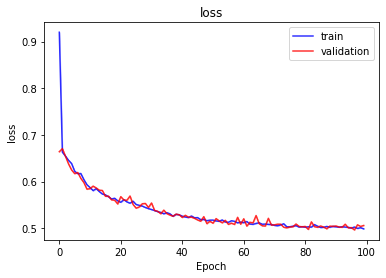

<b>bioma_loss</b>: 0.1424 (min: 0.1424, max: 0.1424)

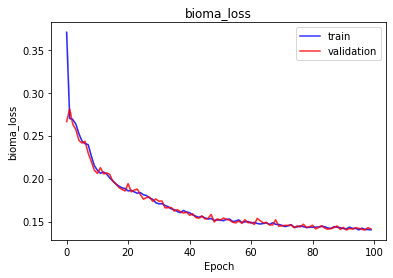

<b>domain_loss</b>: 0.3415 (min: 0.3415, max: 0.3415)

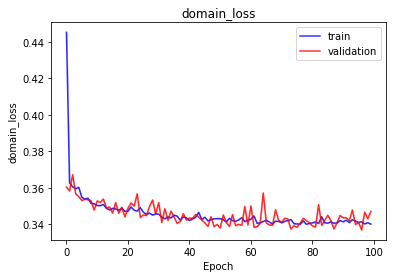

<b>latent_loss</b>: 0.0184 (min: 0.0184, max: 0.0184)

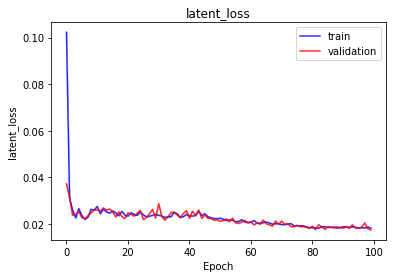

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

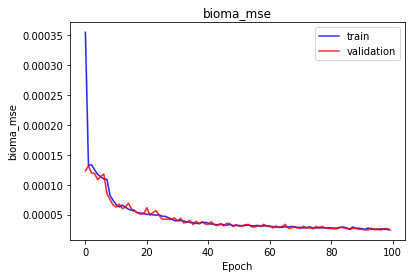

<b>bioma_mae</b>: 0.0013 (min: 0.0013, max: 0.0013)

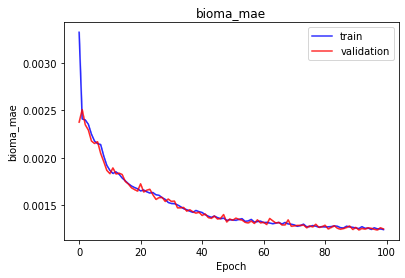

<b>bioma_mape</b>: 8330.7041 (min: 8330.7041, max: 8330.7041)

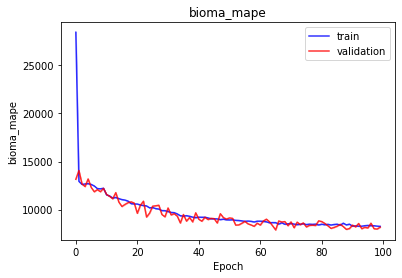

<b>bioma_BrayCurtis</b>: 0.1425 (min: 0.1425, max: 0.1425)

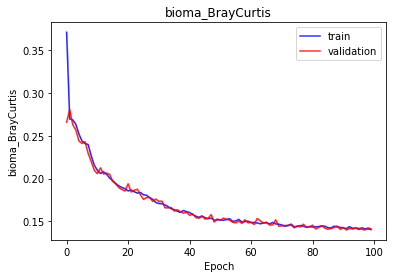

<b>bioma_pearson_corr</b>: 0.9625 (min: 0.9625, max: 0.9625)

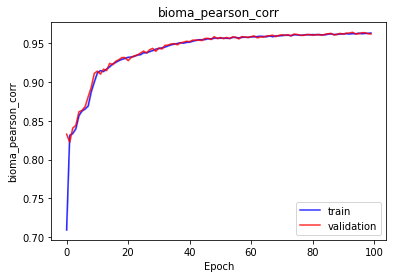

<b>bioma_jensen_shannon_divergence</b>: 0.1982 (min: 0.1982, max: 0.1982)

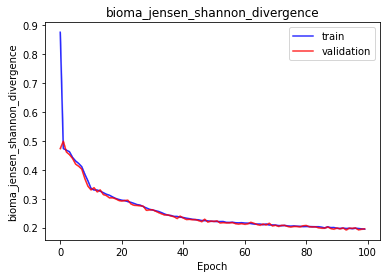

<b>domain_mse</b>: 0.0005 (min: 0.0005, max: 0.0005)

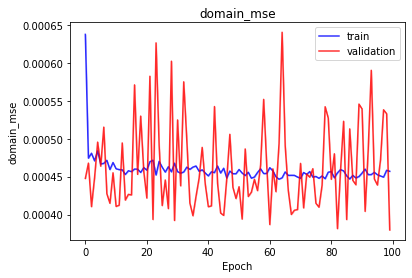

<b>domain_mae</b>: 0.0031 (min: 0.0031, max: 0.0031)

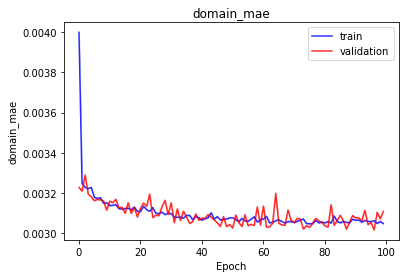

<b>domain_mape</b>: 12232.3232 (min: 12232.3232, max: 12232.3232)

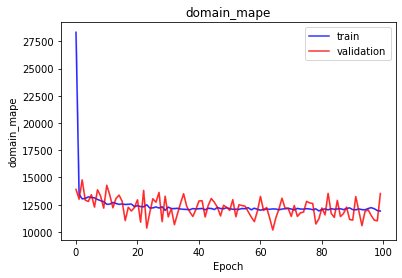

<b>domain_BrayCurtis</b>: 0.3418 (min: 0.3418, max: 0.3418)

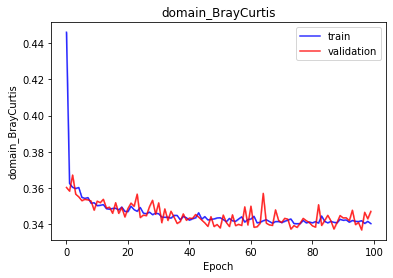

<b>domain_pearson_corr</b>: 0.7932 (min: 0.7932, max: 0.7932)

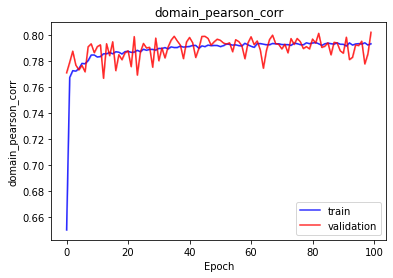

<b>domain_jensen_shannon_divergence</b>: 0.6398 (min: 0.6398, max: 0.6398)

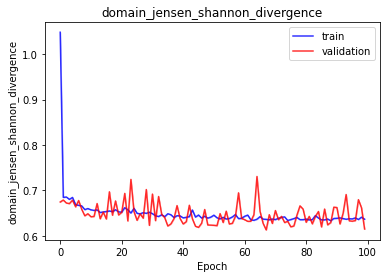

<b>latent_mae</b>: 0.0184 (min: 0.0184, max: 0.0184)

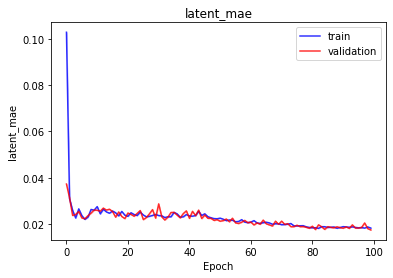

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.5027461421963636 | 0.5027461421963636 | 0.5027461421963636 |
| bioma_loss | 0.14244221150875092 | 0.14244221150875092 | 0.14244221150875092 |
| domain_loss | 0.3414604961872101 | 0.3414604961872101 | 0.3414604961872101 |
| latent_loss | 0.018433062359690666 | 0.018433062359690666 | 0.018433062359690666 |
| bioma_mse | 2.645629683684092e-05 | 2.645629683684092e-05 | 2.645629683684092e-05 |
| bioma_mae | 0.0012646239483729005 | 0.0012646239483729005 | 0.0012646239483729005 |
| bioma_mape | 8330.7041015625 | 8330.7041015625 | 8330.7041015625 |
| bioma_BrayCurtis | 0.14247380197048187 | 0.14247380197048187 | 0.14247380197048187 |
| bioma_pearson_corr | 0.9624876976013184 | 0.9624876976013184 | 0.9624876976013184 |
| bioma_jensen_shannon_divergence | 0.19822236895561218 | 0.19822236895561218 | 0.19822236895561218 |
| domain_mse | 0.00045091580250300467 | 0.00045091580250300467 | 0.00045091580250300467 |
| domain_mae | 0.00306078908033669 | 0.00306078908033669 | 0.00306078908033669 |
| domain_mape | 12232.3232421875 | 12232.3232421875 | 12232.3232421875 |
| domain_BrayCurtis | 0.3418262302875519 | 0.3418262302875519 | 0.3418262302875519 |
| domain_pearson_corr | 0.793150782585144 | 0.793150782585144 | 0.793150782585144 |
| domain_jensen_shannon_divergence | 0.6398233771324158 | 0.6398233771324158 | 0.6398233771324158 |
| latent_mae | 0.01844615489244461 | 0.01844615489244461 | 0.01844615489244461 |


*************

In [23]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=data_domain_train,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [24]:
model, encoder, encoder_domain, decoder = models[0]

### To predict latent space for samples in transfer learning Walters et al. subset

In [25]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

ValueError: Error when checking input: expected bioma_input_222 to have shape (222,) but got array with shape (221,)

### To build model to predict latent space 
Dense model, with transfer_learning_train. With input=domain, output=10 neurons latent space

In [ ]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.001), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [ ]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
#print(result_tl)

In [ ]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

### a) Domain -> latent -> microbiome. Test set TL

In [ ]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

# 4. Auto-encoder OTU latent <a name="AE_latentOTU"></a>

In [ ]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=None,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [ ]:
model, encoder, _, decoder = models[0]

In [ ]:
#encoder = tf.keras.models.load_model('encoder_biome.h5')
#decoder = tf.keras.models.load_model('decoder.h5')

### To predict latent space for samples in transfer learning Walters et al. subset

In [ ]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

In [ ]:
#print(latent_transfer_learning_test)
with np.printoptions(precision=3, suppress=True):
    #print(latent_transfer_learning_train.min())
    #print(latent_transfer_learning_train.max())
    print(latent_transfer_learning_train.mean(axis=0))
    #print(latent_transfer_learning_test.min())
    #print(latent_transfer_learning_test.max())    
    print(latent_transfer_learning_test.mean(axis=0))

In [ ]:
#decoder = tf.keras.models.load_model('decoder.h5')

In [ ]:
latent_transfer_learning_train.shape[1]

### To build model to predict latent space 

In [ ]:
def model_fn_tl():
    in_layer = layers.Input(shape=(data_domain_transfer_learning_train.shape[1],))  
    #net = layers.Dense(64, activation='tanh')(in_layer)
    #net = layers.Dense(32, activation='tanh')(net)
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(16, activation='tanh')(net)  
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.001), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [ ]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
print(result_tl)

In [ ]:
print_results_noEnsemble(result_tl)

In [ ]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

### Domain -> latent -> microbiome. Test set TL

In [ ]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Predictions

In [ ]:
# Absolute abundance transformed to TSS (with epsilon=1E-6)
def transform_to_rel_abundance(dataset):
    epsilon=1E-6
    sum_per_sample = dataset.sum(axis=1)
    num_samples = sum_per_sample.shape
    num_OTUs = np.shape(dataset)[-1] 
    sum_per_sample = sum_per_sample + (num_OTUs * epsilon)
    dividend=dataset+epsilon
    dataset_rel_abund = np.divide(dividend,sum_per_sample[:,None])
    #display(Markdown("{}</p>".format(np.array2string(actual_array,precision=6,floatmode='fixed'))))
    #actual_array.sum(axis=1)
    return dataset_rel_abund

##### Run prediction test set from domain (i.e. environmental features)

In [ ]:
pred_latent = model_tl.predict(data_domain_transfer_learning_test)
pred_domain = decoder.predict(pred_latent)

##### Filter out OTUs not in Maarastawi2018 dataset

In [ ]:
otu_sum_df = df_microbioma_transfer_learning_test.sum(axis=0)
otus_zero_index = otu_sum_df[otu_sum_df == 0].index
otus_zero = [df_microbioma_transfer_learning_test.columns.get_loc(c) for c in otus_zero_index if c in df_microbioma_transfer_learning_test]

In [ ]:
df_microbioma_transfer_learning_test_noZeros = df_microbioma_transfer_learning_test.drop(otus_zero_index,axis=1)
data_microbioma_transfer_learning_test_noZeros = df_microbioma_transfer_learning_test_noZeros.to_numpy(dtype=np.float32)

In [ ]:
pred_domain_common_otus = np.delete(pred_domain, otus_zero, 1)

##### Original relative abundances test set, to compare with predictions

In [ ]:
actual_common_otus = transform_to_rel_abundance(data_microbioma_transfer_learning_test_noZeros)

#### Pearson correlation

In [ ]:
def compute_pearson_Nsamples(actual,pred_domain):
    tot = 0.0
    count = 0
    for i, (act,pred) in enumerate(zip(actual,pred_domain)):
        r, _ = scipy.stats.pearsonr(act,pred)
        if not np.isnan(r):
            count += 1
            tot += r
    r_final = tot/count
    return r_final

In [ ]:
compute_pearson_Nsamples(actual_common_otus,pred_domain_common_otus)

#### Bray-Curtis

In [ ]:
from skbio.diversity import beta_diversity
def compute_braycurtis_Nsamples(actual,pred_domain):
    tot_bc = 0.0
    for i, (act,pred) in enumerate(zip(actual,pred_domain)):
        bc_dm = beta_diversity("braycurtis", [act,pred]) # Source: http://scikit-bio.org/docs/0.4.2/diversity.html
        bc = bc_dm[0,1]
        tot_bc += bc
    bc_final = tot_bc/(pred_domain.shape[0])
    return bc_final

In [ ]:
compute_braycurtis_Nsamples(actual_common_otus,pred_domain_common_otus)